# Laboratorium 9

### 0. Wczytanie danych
Używając metody `load_svmlight_file` z modułu `sklearn` załaduj plik `lab13_files/breast_cancer`, który składa się z 2 elementów: macierzy `X` o wymiarach `683 x 10` oraz wektora `y` o dlugosci `683`. Macierz `X` opisuje badania 683 pacjentow, a wektor `y` ich diagnozy. 

In [1]:
from sklearn.datasets import load_svmlight_file

X, y = load_svmlight_file('lab13_files/breast-cancer')
X = X.toarray()

### 1. Preprocessing
1.1 Korzystajac z `numpy.where` przenumeruj wektor y, tzn zamień wartości 2 i 4 na -1 i +1. 

1.2 Przeskaluj macierz X, tak żeby wartości w każdej kolumnie mieściły się w zakresie [0,1], innymi słowy przeskaluj niezależnie każdą kolumne $X_j$ wg wzoru:


$$
X_j = \frac{X_j-\min(X_j)}{\max(X_j)-\min(X_j)}
$$

In [2]:
import numpy as np

In [3]:
y = np.where(y==2,-1,1)

In [4]:
X=X-(np.min(X,axis=0)) /(np.max(X,axis=0)-np.min(X,axis=0))

### 2. Wizualizacja
Narysuj dane używajac biblioteki `matplotlib`. Użyj wymiarów 1 i 2 z macierzy X, a jako kolory użyj wektora y. Pobaw sie parametrami "s" oraz "alpha" metody `plt.scatter` żeby uzyskać czytelną wizualizacje, np. taką jak poniżej.

<img src="lab13_files/d.png">

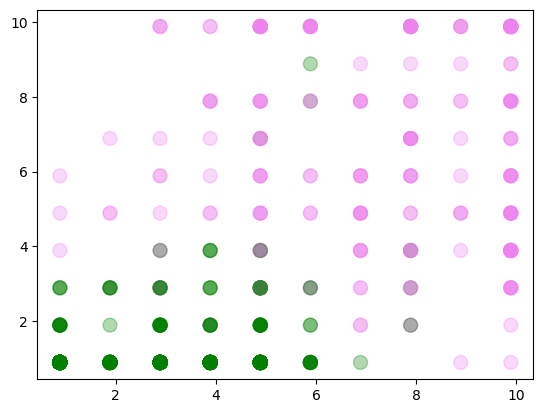

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt


colors = ['green' if label == -1 else 'violet' for label in y]
plt.scatter(X[:, 1], X[:, 2], c=colors, s=100, alpha=0.3)

### 3. Regresja 

Przeprowadź regresje liniową wg wzoru:
$$
\beta = (X^TX)^{-1}X^Ty
$$

In [6]:
b = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.transpose(X)),y)

### 4. Wizualizacja Regresji

Zwizualizuj dane po zrzutowaniu na $\beta$ używajac metody `plt.hist`, tzn. narysuj histogramy $\beta X_+$ oraz
$\beta X_-$ gdzie $X_+$ to wiersze $X$ dla których $y=+1$ i analogicznie $X_-$. Postaraj się wygenerować czytelny wykres podobny do tego poniżej.

<img src="lab13_files/lr1.png">

(array([ 2.,  8., 35., 89., 88., 48., 44., 43., 28., 19., 15.,  4.,  3.,
         4.,  2.,  2.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.]),
 array([-1.    , -0.9225, -0.845 , -0.7675, -0.69  , -0.6125, -0.535 ,
        -0.4575, -0.38  , -0.3025, -0.225 , -0.1475, -0.07  ,  0.0075,
         0.085 ,  0.1625,  0.24  ,  0.3175,  0.395 ,  0.4725,  0.55  ,
         0.6275,  0.705 ,  0.7825,  0.86  ,  0.9375,  1.015 ,  1.0925,
         1.17  ,  1.2475,  1.325 ,  1.4025,  1.48  ,  1.5575,  1.635 ,
         1.7125,  1.79  ,  1.8675,  1.945 ,  2.0225,  2.1   ]),
 <BarContainer object of 40 artists>)

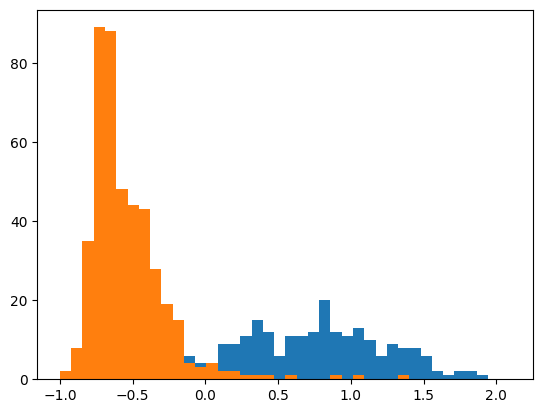

In [7]:
X_Plus=X[y==1]
X_Minus=X[y==-1]


X_plus = X_Plus @ b
X_minus = X_Minus @ b


plt.hist(X_plus, label=r'$\beta X_+$', bins=40, range=(-1,2.1))
plt.hist(X_minus,  label=r'$\beta X_-$', bins=40, range=(-1,2.1))

In [8]:
print(b)

[-5.40240029e-07 -2.66894664e-02  1.27545872e-01  4.70623192e-02
  8.27096446e-03 -8.31897752e-02  9.98654497e-02 -5.56986633e-02
  5.58107678e-02 -2.54939168e-02]


### 5. Klasyfikacja

Przeprowadź "klasyfikacje" naszych pacjentów, ci, którzy zostali zrzutowani na wartość ujemną dostają etykiete $-1$, a ci którzy na wartość dodatnia - etykiete $+1$

In [9]:
X_beta = X @ b
labels = np.where(X_beta >= 0, 1, -1)
print(labels)

[-1  1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1  1 -1 -1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1  1 -1  1 -1  1 -1 -1  1
  1  1  1 -1 -1  1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1 -1  1 -1 -1 -1 -1  1  1 -1  1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1
  1  1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1
 -1  1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1
  1  1 -1  1 -1  1 -1 -1 -1  1  1 -1  1  1  1 -1  1  1 -1 -1 -1 -1  1 -1
 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1  1  1  1 -1 -1  1 -1 -1  1
 -1  1  1 -1  1  1 -1  1  1  1 -1  1 -1  1  1  1  1 -1 -1 -1  1 -1 -1  1
  1  1  1  1  1  1  1  1 -1 -1 -1  1  1  1  1  1  1 -1  1  1  1 -1  1 -1
  1  1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1 -1  1
  1 -1  1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1
  1 -1  1  1  1 -1 -1  1  1 -1  1 -1 -1  1  1 -1 -1

### 6. Ewaluacja

Policz jak dokładny jest ten model, tzn. jak duży jest zbiór
$ \{ (x_i,y_i) : \mathrm{sign}(\beta x_i) = y_i \} $
w stosunku do rozmiaru całego $y$

Powinno udać się uzyskać wynik na poziomie 93-94%

In [10]:
accuracy = np.sum(labels == y) / len(y)
print(accuracy)


0.9385065885797951


### 7. Regularyzacja 
Dodaj parametr `C` do regresji liniowej
$$
\beta = (X^TX + \tfrac{1}{C}I)^{-1}X^Ty
$$

gdzie $I$ - macierz identyczności. 

Dla jakiej wartości `C` wynik jest najlepszy? Jaki wynik udało Ci sie uzyskać?

In [11]:
c=0.0005
b = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)+(1/c)*np.identity(10)),np.transpose(X)),y)
X_beta = X @ b
labels = np.where(X_beta >= 0, 1, -1)
accuracy = np.sum(labels == y) / len(y)
print(accuracy)

0.9516837481698389


### 8. Gratulacje
Właśnie stworzyłeś/-aś swój pierwszy klasyfikator (statystyczny model predykcji). 

Spróbuj zastosować go do innych danych.

### Zadanie dodatkowe

Zaimplementuj powyższą metode jako klase `LRClassifier` wyposażoną w następujące metody:

* konstruktor przyjmujący dwa parametry: 
    * `C` - stała z równania 
    * `scale` - zmienna boolowska (domyslnie `True`) która określa czy macierz `X` ma byc automatycznie znormalizowana (przeskalowana do `[0,1]`)
* `.fit(X, y)` która spowoduje obliczenie $\beta$, dla `X` - dowolnej macierzy, `y` - wektora etykiet skladajacego sie z dwóch unikalnych wartosci (mogą to byc np. 2 różne stringi)
* `.predict(X)`, która zwróci wektor zawierajacy na `i`tej pozycji etykiete "przewidzianą" przez nasz model (pamiętaj o skalowaniu jesli `scale==True`!)

Przykladowe użycie:

    clf = LRClassifier(C=100)
    Xt = np.array([[1, 0], [1, 1], [1, 2], [1, 3], [1, 4]])
    yt = np.array(['x', 'x', 'y', 'y', 'y'])
    clf.fit(Xt, yt)
    X = np.array([[1, -1], [1, 0.9], [1, 2.1]])
    print(clf.predict(X)) # ['x', 'x', 'y']